# **데이터 전처리**

In [ ]:
import os
import cv2
import numpy as np
import re
import tempfile
import shutil
from PIL import Image
import glob

# opencv 한글 읽기 오류 해결 - 이미지 읽기
def imreadEX(image_path):
    if re.compile('[^ㄱ-ㅣ가-힣]+').sub('', image_path):
        stream = open(image_path, "rb")
        bytes = bytearray(stream.read())
        numpyarray = np.asarray(bytes, dtype=np.uint8)
        img = cv2.imdecode(numpyarray, cv2.IMREAD_UNCHANGED)
        if not img is None:
            return img
        else:
            file_tmp = tempfile.NamedTemporaryFile().name
            shutil.copy(image_path, file_tmp)
            image_path = file_tmp
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    return img

# opencv 한글 읽기 오류 해결 - 이미지 저장
def imwrite(filename, img, params=None):
    try:
        ext = os.path.splitext(filename)[1]
        result, n = cv2.imencode(ext, img, params)
        if result:
            with open(filename, mode='w+b') as f:
                n.tofile(f)
                return True
        else:
            return False
    except Exception as e:
        print(e)
        return False


# 하나씩 잘라서 저장 -> 디렉토리로 나누어 차후 학습 데이터로 사용
imgIdx = 0
for filename in glob.glob('*.jpg'):
    src = imreadEX(filename)
    dest = src.copy()
    dest = src[13:62, 17:37]
    savePath = "C:/Users/user/Downloads/hw5/classifiedData/number/" + filename[0]
    if not (os.path.isdir(savePath)):
        os.makedirs(os.path.join(savePath))
    savePath += "/" + str(imgIdx) + ".jpg"
    imwrite(savePath, dest)
    imgIdx += 1
imgIdx = 0
for filename in glob.glob('*.jpg'):
    src = imreadEX(filename)
    dest = src.copy()
    dest = src[13:62, 38:58]
    savePath = "C:/Users/user/Downloads/hw5/classifiedData/number/" + filename[1]
    if not (os.path.isdir(savePath)):
        os.makedirs(os.path.join(savePath))
    savePath += "/" + str(imgIdx) + ".jpg"
    imwrite(savePath, dest)
    imgIdx += 1
imgIdx = 0
for filename in glob.glob('*.jpg'):
    src = imreadEX(filename)
    dest = src.copy()
    dest = src[13:62, 93:113]
    savePath = "C:/Users/user/Downloads/hw5/classifiedData/number/" + filename[3]
    if not (os.path.isdir(savePath)):
        os.makedirs(os.path.join(savePath))
    savePath += "/" + str(imgIdx) + ".jpg"
    imwrite(savePath, dest)
    imgIdx += 1
imgIdx = 0
for filename in glob.glob('*.jpg'):
    src = imreadEX(filename)
    dest = src.copy()
    dest = src[13:62, 114:134]
    savePath = "C:/Users/user/Downloads/hw5/classifiedData/number/" + filename[4]
    if not (os.path.isdir(savePath)):
        os.makedirs(os.path.join(savePath))
    savePath += "/" + str(imgIdx) + ".jpg"
    imwrite(savePath, dest)
    imgIdx += 1
imgIdx = 0
for filename in glob.glob('*.jpg'):
    src = imreadEX(filename)
    dest = src.copy()
    dest = src[13:62, 135:155]
    savePath = "C:/Users/user/Downloads/hw5/classifiedData/number/" + filename[5]
    if not (os.path.isdir(savePath)):
        os.makedirs(os.path.join(savePath))
    savePath += "/" + str(imgIdx) + ".jpg"
    imwrite(savePath, dest)
    imgIdx += 1
imgIdx = 0
for filename in glob.glob('*.jpg'):
    src = imreadEX(filename)
    dest = src.copy()
    dest = src[13:62, 157:177]
    savePath = "C:/Users/user/Downloads/hw5/classifiedData/number/" + filename[6]
    if not (os.path.isdir(savePath)):
        os.makedirs(os.path.join(savePath))
    savePath += "/" + str(imgIdx) + ".jpg"
    imwrite(savePath, dest)
    imgIdx += 1

# 한글: [13:62, 62:85]
# 0  : [13:62, 17:37]
# 1  : [13:62, 38:58]
# 2  : [13:62, 93:113]
# 3  : [13:62, 114:134]
# 4  : [13:62, 135:155]
# 5  : [13:62, 157:177]

# **학습 및 테스트**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Epoch:001] train hanloss: 3.50461 train hanaccuracy: 0.0750 | train numloss: 2.27857 train numaccuracy: 0.2400
[Epoch:002] train hanloss: 3.03780 train hanaccuracy: 0.2396 | train numloss: 1.55020 train numaccuracy: 0.5375
[Epoch:003] train hanloss: 2.63178 train hanaccuracy: 0.3312 | train numloss: 0.92154 train numaccuracy: 0.7475
[Epoch:004] train hanloss: 2.21919 train hanaccuracy: 0.4562 | train numloss: 0.55035 train numaccuracy: 0.8875
[Epoch:005] train hanloss: 1.89831 train hanaccuracy: 0.5188 | train numloss: 0.33359 train numaccuracy: 0.9375
[Epoch:006] train hanloss: 1.58469 train hanaccuracy: 0.6375 | train numloss: 0.20457 train numaccuracy: 0.9700
[Epoch:007] train hanloss: 1.30958 train hanaccuracy: 0.6896 | train numloss: 0.13490 train numaccuracy: 0.9825
[Epoch:008] train hanloss: 1.07062 train hanaccuracy: 0.7667 | train numloss: 0.08654 t

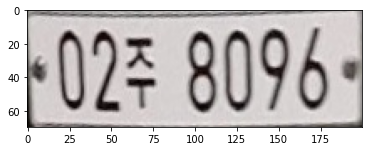

02루8096


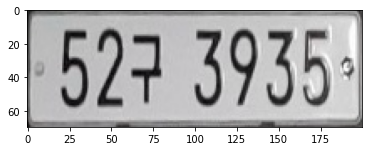

52구3525


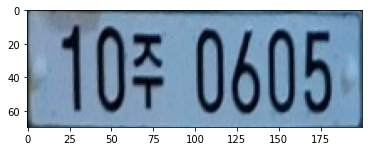

10주1235


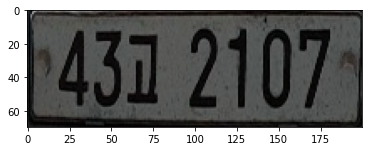

43고2107


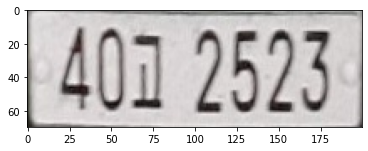

40고3533


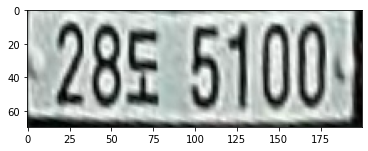

26도5100


In [3]:
import os
import torch
import torch.nn as nn
import cv2
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import torchvision
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.image as img
import matplotlib.pyplot as pp
import glob
import re
import tempfile
import shutil

from google.colab import drive
drive.mount('/content/drive')

batch_size = 80 # 83줄 forward에 view 함수 맞출 때 배치 사이즈 사용했는데
                # 학습과 테스트시 배치 사이즈가 달라서 전역으로 두고 사용함

# Model Class

# 테스트 데이터 이미지 한 장씩 넣을 때 데이터셋 제작
class TestDataset(Dataset):
    def __init__(self, image):
        self.transform = transforms.ToTensor()
        self.image = image

    def __getitem__(self, index):
        x = self.image
        x = self.transform(x)
        return x

    def __len__(self):
        return 1

class ConvBlockPool(nn.Module):
    def __init__(self, in_channel, out_channel):
        super(ConvBlockPool, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_channel, out_channel, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(out_channel),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
  
    def forward(self, tensor):
        return self.block(tensor)

class ConvBlock(nn.Module):
    def __init__(self, in_channel, out_channel):
        super(ConvBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_channel, out_channel, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(out_channel),
            nn.ReLU()
        )
  
    def forward(self, tensor):
        return self.block(tensor)

class BasicModel(nn.Module):
    def __init__(self, in_channel, num_classes, batch_size):
        super(BasicModel, self).__init__()
        self.batch_size = batch_size
        k = 32
        self.block = nn.Sequential(
            ConvBlock(in_channel, k),
            ConvBlockPool(k, k*2),
            ConvBlockPool(k*2, k*2),
        )
        self.linear = nn.Sequential(
            nn.Linear(k*2*12*5, k*2),
            nn.ReLU(),
            nn.Linear(k*2, num_classes)
        )
    
    def forward(self, tensor):
        out = self.block(tensor)
        out = out.view(batch_size, -1)
        return self.linear(out)

# opencv에서 한글 포함된 파일 읽을 때의 오류 해결
def imreadEX(image_path):
    if re.compile('[^ㄱ-ㅣ가-힣]+').sub('', image_path):
        stream = open(image_path, "rb")
        bytes = bytearray(stream.read())
        numpyarray = np.asarray(bytes, dtype=np.uint8)
        img = cv2.imdecode(numpyarray, cv2.IMREAD_UNCHANGED)
        if not img is None:
            return img
        else:
            file_tmp = tempfile.NamedTemporaryFile().name
            shutil.copy(image_path, file_tmp)
            image_path = file_tmp
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    return img



epoch = 30
learning_rate = 1e-03
in_channel = 3
betas = (0.9, 0.999)
hangulConverter = [
                    '가', '거', '고', '구', '나', '너', '노', '누', '다',
                    '더', '도', '두', '라', '러', '로', '루', '마', '머',
                    '모', '무', '버', '보', '부', '서', '소', '수', '어',
                    '오', '우', '저', '조', '주', '하', '호'
]
device = 'cuda' if torch.cuda.is_available() else 'cpu'


hangul_trainset = torchvision.datasets.ImageFolder(root='/content/drive/My Drive/학교/DASH Lab/DL_study/codes_and_data/hw5-classifiedData/hangul',
                                                    transform=transforms.ToTensor())
number_trainset = torchvision.datasets.ImageFolder(root='/content/drive/My Drive/학교/DASH Lab/DL_study/codes_and_data/hw5-classifiedData/number',
                                                    transform=transforms.ToTensor())


hangul_classes = hangul_trainset.classes
number_classes = number_trainset.classes

hangul_trainLoader = DataLoader(hangul_trainset, batch_size=batch_size, shuffle = True, drop_last=True, pin_memory=True, num_workers=2)
number_trainLoader = DataLoader(number_trainset, batch_size=batch_size, shuffle = True, drop_last=True, pin_memory=True, num_workers=2)

hangul_model = BasicModel(in_channel=in_channel, num_classes=34, batch_size=batch_size).to(device)
number_model = BasicModel(in_channel=in_channel, num_classes=10, batch_size=batch_size).to(device)

loss_func = nn.CrossEntropyLoss()
optimizerH = torch.optim.Adam(hangul_model.parameters(), lr=learning_rate, betas=betas)
optimizerN = torch.optim.Adam(number_model.parameters(), lr=learning_rate, betas=betas)

for ep in range(epoch):
    # train
    avg_lossH = 0
    avg_accH = 0
    countH = 0

    # 한글 데이터 학습
    for u, [image, label] in enumerate(hangul_trainLoader):
        x = image.to(device)
        y = label.to(device)

        optimizerH.zero_grad()
        output = hangul_model.forward(x)
        loss = loss_func(output, y)
        avg_lossH += loss.item()

        loss.backward()
        optimizerH.step()

        _, index = torch.max(output, 1)
        avg_accH += (index == y).sum().float() / len(y)
        countH += 1

    avg_lossH /= countH
    avg_accH /= countH

    avg_lossN = 0
    avg_accN = 0
    countN = 0

    # 숫자 데이터 학습
    for u, [image, label] in enumerate(number_trainLoader):
        x = image.to(device)
        y = label.to(device)

        optimizerN.zero_grad()
        output = number_model.forward(x)
        loss = loss_func(output, y)
        avg_lossN += loss.item()

        loss.backward()
        optimizerN.step()

        _, index = torch.max(output, 1)
        avg_accN += (index == y).sum().float() / len(y)
        countN += 1

    avg_lossN /= countN
    avg_accN /= countN
    print("[Epoch:%03d] train hanloss: %.5f train hanaccuracy: %.4f | train numloss: %.5f train numaccuracy: %.4f"
            % (ep+1, avg_lossH, avg_accH, avg_lossN, avg_accN))

# 테스트 부분
for file in glob.glob('/content/drive/My Drive/학교/DASH Lab/DL_study/codes_and_data/hw5-classifiedData/testData/*.jpg'):
    src = imreadEX(file)
    pp.imshow(src)
    pp.show()

    # 한 번호판에서 숫자 6개와 한글 1개를 따로 잘라서 테스트
    first = src.copy()
    first = src[13:62, 17:37]    # 1
    
    second = src.copy()
    second = src[13:62, 38:58]   # 2
    
    third = src.copy()
    third = src[13:62, 93:113]   # 3
    
    forth = src.copy()
    forth = src[13:62, 114:134]  # 4
    
    fifth = src.copy()
    fifth = src[13:62, 135:155]  # 5
    
    sixth = src.copy()
    sixth = src[13:62, 157:177]  # 6
    
    han = src.copy()
    han = src[13:62, 62:85]      # 한글
    
    test1 = TestDataset(first)
    test2 = TestDataset(second)
    testhan = TestDataset(han)
    test3 = TestDataset(third)
    test4 = TestDataset(forth)
    test5 = TestDataset(fifth)
    test6 = TestDataset(sixth)

    TL1 = DataLoader(test1, batch_size=1, pin_memory=True, num_workers=2)
    TL2 = DataLoader(test2, batch_size=1, pin_memory=True, num_workers=2)
    TLhan = DataLoader(testhan, batch_size=1, pin_memory=True, num_workers=2)
    TL3 = DataLoader(test3, batch_size=1, pin_memory=True, num_workers=2)
    TL4 = DataLoader(test4, batch_size=1, pin_memory=True, num_workers=2)
    TL5 = DataLoader(test5, batch_size=1, pin_memory=True, num_workers=2)
    TL6 = DataLoader(test6, batch_size=1, pin_memory=True, num_workers=2)

    batch_size = 1
    ans = ""
    with torch.no_grad():
        for image in TL1:
            x = image.to(device)
            output = number_model.forward(x)
            _, output_index = torch.max(output, 1)
            out = output_index.item()
            ans += str(out)
    with torch.no_grad():
        for image in TL2:
            x = image.to(device)
            output = number_model.forward(x)
            _, output_index = torch.max(output, 1)
            out = output_index.item()
            ans += str(out)
    with torch.no_grad():
        for image in TLhan:
            x = image.to(device)
            output = hangul_model.forward(x)
            _, output_index = torch.max(output, 1)
            out = output_index.item()
            ans += hangulConverter[out]
    with torch.no_grad():
        for image in TL3:
            x = image.to(device)
            output = number_model.forward(x)
            _, output_index = torch.max(output, 1)
            out = output_index.item()
            ans += str(out)
    with torch.no_grad():
        for image in TL4:
            x = image.to(device)
            output = number_model.forward(x)
            _, output_index = torch.max(output, 1)
            out = output_index.item()
            ans += str(out)
    with torch.no_grad():
        for image in TL5:
            x = image.to(device)
            output = number_model.forward(x)
            _, output_index = torch.max(output, 1)
            out = output_index.item()
            ans += str(out)
    with torch.no_grad():
        for image in TL6:
            x = image.to(device)
            output = number_model.forward(x)
            _, output_index = torch.max(output, 1)
            out = output_index.item()
            ans += str(out)

    
    print(ans)
